# Moderation, mediation and instrumental variables

Moderation is a versatile mathematical tool that allow us to understand interaction effects, on the other hand mediation allow us to peek into the black box of causal relationship and understand how a variable affects another. Finally instrumental variables enpower us to mesure impact acurately. 

## Moderation

The formal definition of moderation is extremely simple: it’s the inclusion in a regression of a multiplication between two predictors. And can be used to understand all of the following behavioral phenomena: 
1. Segmentation
2. Interaction
3. Nonlinearities

We can use segmenting for observation data, but the proble with that approach is that each variable is examinated independently. Unfortunately, that’s precisely the case we’re trying to account for! In other words, simply adding *children as a variable in our regression doesn’t account for the interaction between *play area and *children.

We can solve the proble adding by adding a fourth coefficient, for the interecation: VisitDuration = β 0 + β p .PlayArea + β c .Children + β i .(PlayArea * Children)

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from statsmodels.formula.api import ols

In [67]:
hist_data = pd.read_csv('data/cmarket_historical.csv')

In [68]:
hist_data.head()

,day,store_id,children,age,duration,play_area,prop_children,grocery_purchases
0,1,1,0,32,31.312290,1,0.319686,62.045753
1,1,1,0,73,22.268927,1,0.319686,50.388761
2,1,1,1,42,57.147008,1,0.319686,106.724868
3,1,1,0,36,19.685268,1,0.319686,38.612676
4,1,1,0,55,27.591965,1,0.319686,21.607421


In [69]:
ols('duration~play_area * children', data=hist_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                 7.302e+05
Date:                Wed, 10 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:57:32   Log-Likelihood:            -2.0215e+06
No. Observations:              623610   AIC:                         4.043e+06
Df Residuals:                  623606   BIC:                         4.043e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             19.9876      0.012   1605.505      0.000      19.963      20.012
play_area              3.9591      0.021    188.838      0.000       3.918       4.000
children              10.0153      0.020    496.599      0.000       9.976      10.055
play_area:children    20.9866      0.033    627.832      0.000      20.921      21.052
==============================================================================
Omnibus:                    34141.902   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134224.984
Skew:                           0.106   Prob(JB):                         0.00
Kurtosis:                       5.263   Cond. No.                         5.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Average per costumer:
* Without children / without play area = 19.98 min
* Without children / with play area = 19.98 + 3.95 min
* With children / without play area = 19.98 + 10.01 min
* with children / with play area = 19.98 + 3.95 + 10.01 + 20.98 min

In [70]:
costumer_data = {'children': [0,0,1,1], 'play_area': [0,1,0,1], 
            'avg_time_min':[19.98,23.93,29.99,54.92]}

df = pd.DataFrame(data=costumer_data)

(-0.1, 1.05)

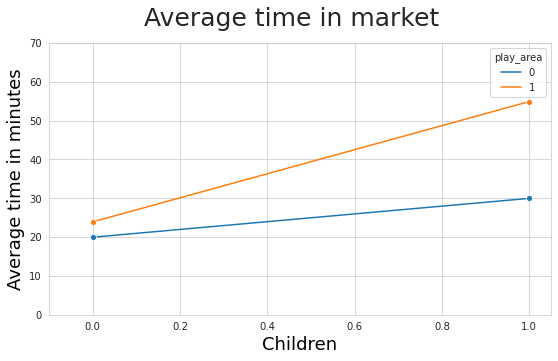

In [71]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=df, x='children', y='avg_time_min',
             hue='play_area', marker='o')

rcParams['axes.titlepad'] = 30
fig.suptitle('Average time in market', size= 25)
ax.set_ylabel('Average time in minutes', color='Black', size=18)
ax.set_xlabel('Children', color='Black', size=18)

plt.ylim(0, 70)
plt.xlim(-.1, None)

If there was no interaction effect between our two variables, the two lines would be parallel, as having a play area would shift the average visit duration. Choosing between stores requieres determining the store and custumer characteristics that have the stronges interactions with the playarea variable.

#### Segmenting experimental data

The process to segment experimental data is pretty much identical to the process we just used with observational data. When running an experiment, we often care not only about measuring the averages effect of the treatment in our sample, but also about determinin groups for with the effect is particularly stron or weak. Personalization is a key rational for targeting specific messages or tratmentes to specific segments of our customer base. 

#### Nonlinearities

In [72]:
df2 = pd.read_csv('data/nonlin_data.csv')
df2.head(15)

,Emails,Purchases,Properties,Customers,pred_PP_lin,pred_PP_quad
0,1.0,-0.073047,1.0,1.010014,0.513405,0.214499
1,1.5,0.409038,1.5,2.174739,0.626788,0.427518
2,2.0,0.704445,2.0,5.447952,0.740172,0.628815
3,2.5,1.059146,2.5,5.256522,0.853556,0.818390
4,3.0,1.196953,3.0,9.022790,0.966939,0.996244
5,3.5,1.190517,3.5,12.269720,1.080323,1.162376
6,4.0,1.313141,4.0,17.356543,1.193707,1.316786
7,4.5,1.452410,4.5,22.309126,1.307090,1.459474
8,5.0,1.434365,5.0,21.540943,1.420474,1.590440
9,5.5,1.792759,5.5,25.841304,1.533858,1.709685


<AxesSubplot:xlabel='Properties', ylabel='Customers'>

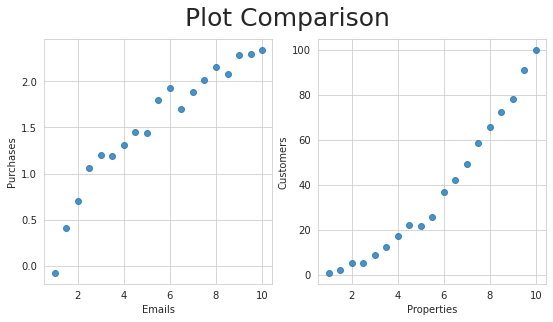

In [73]:
fig, axes = plt.subplots(1,2, figsize=(9,4.5))
fig.suptitle('Plot Comparison', size= 25)

sns.regplot(x='Emails', y='Purchases', data=df2, fit_reg=False, ax=axes[0])
sns.regplot(x='Properties', y='Customers', data=df2, fit_reg=False, ax=axes[1])

Mathematically, the curve on the left is concave, and the curve on the right is convex.
A common mistake is to believe that such realitionship cannot be represented with linear regression.

In many circunstances, the relationship between a cause and an effect is non linear (decreaing returns), we can address nonlinear relationships between variables by adding the explanatory variable taken to the square, adding a quadratic term can significantly improve the accuracy of a regression. However, a quadratic term is nothing more that an interaction between a variable and itself. In other words, anonlinear causal relationship between two variables can be reframed as self-moderation. In reality, what matters for a regression to be “linear” is that the predicted variable has a linear relationship with the coefficients, not the variables.

In [74]:
model = ols('Purchases ~ Emails + I(Emails**2)', data=df2)
model.fit().summary()

/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Purchases   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     197.6
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           5.25e-12
Time:                        17:57:33   Log-Likelihood:                 11.973
No. Observations:                  19   AIC:                            -17.95
Df Residuals:                      16   BIC:                            -15.11
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.2467      0.131     -1.878      0.079      -0.525       0.032
Emails             0.4846      0.054      8.920      0.000       0.369       0.600
I(Emails ** 2)    -0.0234      0.005     -4.862      0.000      -0.034      -0.013
==============================================================================
Omnibus:                        0.776   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.679   Jarque-Bera (JB):                0.404
Skew:                          -0.350   Prob(JB):                        0.817
Kurtosis:                       2.853   Cond. No.                         215.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There are three types of moderation, wich are mathematically identical but have different interprtation base of cariables involved:
* Segmentation - In segmentatin personal characteristics moderate the effect of a business behavior, such as an experimental intervention.
* Interaction - In interaction we observe moderation between variables of the same nature, such as two demographic or thow behavioral variables.
* Nonlinearities - with nonlinearities a variable self-moderates its a causal impact on another variable.

## How to apply moderation

In [75]:
hist_data.groupby('play_area').agg(M=('duration', lambda x: x.mean()),
                           SD = ('duration', lambda x: x.std()))

,M,SD
play_area,,
0,23.803928,6.970786
1,36.360939,17.111469


In our example there are 10 minute difference in standar deviations, give that the differences in means across the groups is about 13 minutes.

Beyond improving the fit of your regression and accounting for intuitive behavioral effecs such as decrasing returns, including self-moderation in your regresion can alert you to the presence of a hidden moderator. Loking the market example: the relation ship between visit duration and groceries purchases, it's conceivable that very short visits represent targeted shopping runs to buy a specific article whereas longer tripes are more likely to be grocery runs.

Among customers with childre, we may also imagine that the increase in visit duration depends on the age, a.g, if grandparenst are less likely to drop off their grandchildren at the play area that parents.

In [76]:
ols('duration~play_area * children * age', data=hist_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 3.254e+05
Date:                Wed, 10 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:57:33   Log-Likelihood:            -2.0120e+06
No. Observations:              623610   AIC:                         4.024e+06
Df Residuals:                  623602   BIC:                         4.024e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 20.0166      0.037    534.906      0.000      19.943      20.090
play_area                  3.9110      0.063     62.014      0.000       3.787       4.035
children                   9.9983      0.061    165.012      0.000       9.880      10.117
play_area:children        29.1638      0.101    290.105      0.000      28.967      29.361
age                       -0.0006      0.001     -0.820      0.412      -0.002       0.001
play_area:age              0.0010      0.001      0.806      0.420      -0.001       0.003
children:age               0.0003      0.001      0.297      0.767      -0.002       0.003
play_area:children:age    -0.1637      0.002    -86.139      0.000      -0.167      -0.160
==============================================================================
Omnibus:                    29231.811   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106719.896
Skew:                          -0.003   Prob(JB):                         0.00
Kurtosis:                       5.027   Cond. No.                         955.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# Determine 90%-CI for moderated moderation coefficient
def metric_fun(dat_df):
    model = ols("duration~play_area * children * age", data=dat_df)
    res = model.fit(disp=0)
    coeff = res.params['play_area:children:age']
    return coeff
#metric_fun(hist_data_df)

def boot_CI_fun(dat_df, metric_fun, B = 100):
    N = len(dat_df)
    conf_level = 0.9
    coeffs = []

    for i in range(B):
        sim_data_df = dat_df.sample(n=N, replace = True)
        coeff = metric_fun(sim_data_df)
        coeffs.append(coeff)
    coeffs.sort()
    start_idx = round(B * (1 - conf_level) / 2)
    end_idx = - round(B * (1 - conf_level) / 2)
    confint = [coeffs[start_idx], coeffs[end_idx]]
    return(confint)

boot_CI_fun(hist_data, metric_fun)

[-0.16793850521008857, -0.15948858175778768]

The coefficient for our 3-way yerm, the last one in output is negative as well as economically meaningful, and the 90%-Ci is approximately -0.167 / -0.160... doderated moderation depends on whether the underlying logic is that of segmentation or interaction:
* We would interpret it as segmentation if we have two personal-characteristic
variables moderating a business characteristic or business behavior.
* With three variables of the same nature, we would interpret it as a three-way
interaction between three variables



### Validating moderation with bootstrap

In [78]:
#Changing the metric function
def metric_fun2(dat_df):
    model = ols("duration~play_area * children", data=dat_df)
    res = model.fit(disp=0)
    coeff = res.params['play_area:children']
    return coeff
metric_fun(hist_data_df)

# Changing the bootstrap function
def boot_CI_fun2(dat_df, metric_fun, B = 100):
  #Setting the number of bootstrap samples
  
  #Setting sample size
  N = 10000
  conf_level = 0.9
  coeffs = []
  
  
  for i in range(B):
      sim_data_df = dat_df.sample(n=N, replace = True)
      coeff = metric_fun(sim_data_df)
      coeffs.append(coeff)
  
  coeffs.sort()
  start_idx = round(B * (1 - conf_level) / 2)
  end_idx = - round(B * (1 - conf_level) / 2)
  
  confint = [coeffs[start_idx], coeffs[end_idx]]  
  
  return(confint)

boot_CI_fun2(hist_data_df, metric_fun2, B = 1000)

NameError: name 'hist_data_df' is not defined

### Interpreting individual coefficients

In [ ]:
centered_data_df = hist_data.copy()
centered_data_df['age'] = centered_data_df['age'].subtract(centered_data_df['age'].mean())

In [ ]:
centered_data_df['play_area'] = centered_data_df['play_area']

How should you set the defaults for your varaibles? It depends on the business problem at hand as well as the nature of the variable; 
* In some situations the average is only important in a subgroup, or we'll be interested in the maximum/minimum.
* For binary variables, the relevant default is usually the status quo. (Play areas)
* For categorical variables such as gender or state, unless there is a meaningful references point, you can default to the most commo category. 

VisitDuration =β 1 + β p1 .PlayArea + β a1 .Age + β pa1 .(PlayArea * Age) + β g1 .Gender +
β s1 .State + β gs1 .(Gender * State)

### Calcularing effects at the level of the business decisions

A main adventage of the intepretation of individual coefficient is that it'll be compared with the numbers obtained in other circunstances. Therefore, an alternative approach is to calculate the value of your effect variable of interest with and without that decision.
In order to take a business decision, generally we don't see the varega effect, insted, for each store without play area, we can directely determinate the what would be the averega additional visit duration if we added a play area in another store.  

In [ ]:
hist_data.head()

In [ ]:
def business_metric_fun(dat_df):
    model = ols("duration~play_area * (children + age)", data=dat_df)
    res = model.fit(disp=0)
    action_dat_df = dat_df[dat_df.play_area == 0].copy()
    action_dat_df['pred_dur0'] = res.predict(action_dat_df)
    action_dat_df.play_area = 1
    action_dat_df['pred_dur1'] = res.predict(action_dat_df)
    action_dat_df['pred_dur_diff'] = action_dat_df.pred_dur1 - action_dat_df.pred_dur0
    action_res_df = action_dat_df.groupby(['store_id']).agg(mean_dur_diff=('pred_dur_diff', 'mean'),
    tot_dur_diff=('pred_dur_diff', 'sum'))
    return action_res_df
action_res_df = business_metric_fun(hist_data)
action_res_df.describe()

So can then select the stores with the highest benefits of a play area

## Mediation and Instrumental Variables

Mediation refers to the presence of an intermediary variable between two variables in a chain. From a causal perspective, mediation reduces the risk of false positives, and not accounting adequately, wheras from a behavioral perspective, medaiton helps us better design and understand experiments:
* Mediation allows us to understand the machanisms at plat and generate actionable insights.
* In certain circumstances, not accounting for mediation could bias a causal estimate.

Mediation is not just a 'nice to have' tool. In some circumstances, not accounting for it can introduce biases in our causal estimates. The simplest case where this occurs is when we're trying to measure the (total) effect of one variable on another, but we unwittingly include a madiator in our regression as a control variable. 

Measuring mediatin is straightforward a bit cumbersome. It boils down to running several regressions to estimate the following:
* The total effect of PlayArea on GroceryPurchases - the indirect effect
* The effect of  PlayArea on GroceryPurchases that is mediated by visitduration - indirect effect.
* The effect of playarea on grocerypurchases that is not mediated by visitduration - direct effect

If we find no evidence for the indirect, mediated path, we should reject our tentative mediator. Conversily, if we find no evidence for the direct path, then the effect is fully mediated. The % of total effect mediated is a common and useful way to sumarize that evidence.

In [ ]:
'''Total Effect'''
ols('grocery_purchases~play_area', data=hist_data).fit().summary()

The total effect is approximatly 27.62, meaning that adding a play area increases the amount spent on groceries by 27.62 on average, not holding the visit duration constant.

In [ ]:
'''mediated effect'''
ols('duration~play_area', data=hist_data).fit().summary()

The logic behind: if a play area increases the average duration of a visit by X minutes and each additional minute of visit duration increases the amount spent on groceries by $Y, the adding a play area increases the amount spent on groceries by X*Y. 
* With the results of the regression, we can say that play_area adds about 12.5 minutes of visit duration

In [ ]:
ols('grocery_purchases~duration+play_area', data=hist_data).fit().summary()

The second regression is for the arrow between visit_duration and grocery_purchases, Including play_area. Running a regression with our primary cause and our mediator as explanatory variables yields coefficientes of respectively 0.1575usd to the average grocery purchase per visit, and the second says that adding one minute to visit duration adds about 2.18usd to the average grocery purchases per visit.

In [ ]:
mediated_effect = 12.55*2.18
mediated_effect

In [ ]:
total_effect= 27.62
per_mediated = mediated_effect / total_effect 
per_mediated

In [ ]:
per_unmediated = (total_effect - mediated_effect) / total_effect
per_unmediated

## Instrumental Variables

In [ ]:
from linearmodels.iv import IV2SLS

In [ ]:
exp_data = pd.read_csv('data/exp.csv')

First of all, we need to do sanity checks by runing the linear regressions for the first arm of the mediation and for the total effect. If either of thes yields a coefficient very close to zero, that would jeopardize our IV regression. 

In [ ]:
ols('call_CSAT~group+age+reason', data=exp_data).fit(disp=0).summary()

In [ ]:
ols('M6Spend~group+age+reason', data=exp_data).fit(disp=0).summary()

In [ ]:
ols("M6Spend~call_CSAT+age+reason", data=exp_data).fit(disp=0).summary()

Both coefficients are safely distinct from zero, so we can move to our IV regression.

In [ ]:
exp_data.head()

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
import numpy as np

from linearmodels.iv import IV2SLS

In [ ]:
iv_mod = IV2SLS.from_formula('M6Spend ~ 1 + age + reason + [call_CSAT ~ group]', 
                             exp_data).fit()

In [ ]:
hist_data.head()

In [ ]:
formula = 'grocery_purchases ~ 1 + play_area + [children ~ duration]'

In [ ]:
mod = IV2SLS.from_formula(formula, hist_data).fit()

In [ ]:
mod.params

In [ ]:
import numpy as np
from linearmodels.datasets import wage
from linearmodels.iv import IV2SLS

data = wage.load()

In [ ]:
data.head()

In [ ]:
formula = 'np.log(wage) ~ 1 + exper + exper **2 + brthord + [educ ~ sibs]'

In [ ]:
mod = IV2SLS.from_formula(formula, data).fit()

In [ ]:
mod.params